IMPORTING LIBRARIES

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from scipy import stats

LOAD THE DATASET

In [33]:
data=pd.read_csv('data_car.csv')

In [34]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


EDA

In [35]:
data.shape

(11914, 16)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [37]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [38]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [39]:
data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [40]:
data['Engine HP'].nunique()

356

In [41]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [42]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [43]:
corr=data.corr()

<ipython-input-43-c0bda979f113>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

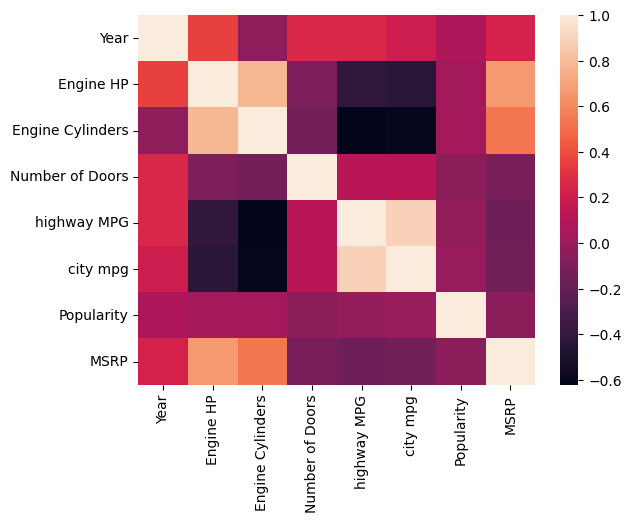

In [44]:
sns.heatmap(corr)

PRE PROCESSING

In [45]:
data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0], inplace = True)

In [46]:
data['Engine HP'].fillna(data['Engine HP'].mean(), inplace = True)

In [47]:
data['Engine Cylinders'].fillna(data['Engine Cylinders'].median(), inplace = True)
data['Number of Doors'].fillna(data['Number of Doors'].median(), inplace = True)

In [48]:
data['Market Category'].fillna(data['Market Category'].mode()[0],inplace=True)

In [49]:
data.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

cleaning string in columns name

In [50]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [51]:
#Making List of Categorical Columns

categorical = list(data.dtypes[data.dtypes == 'object'].index)
categorical

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [52]:
#Cleaning Categorical Data in our data set

for col in categorical:
    data[col] = data[col].str.lower().str.replace(" ", "_")
    
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [53]:
#Checkin the unique values in categorical columns
for col in categorical:
    print(col)
    print(data[col].unique())
    print("Number of unique classes ",data[col].nunique())
    print('\n')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
Number of unique classes  48


model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-clas

In [54]:
#removing irrelevent column
data.drop(data.loc[data['transmission_type']=='unknown'].index, inplace=True)
data.shape

(11895, 16)

In [55]:
data.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11890,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11891,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11892,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11893,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [58]:
#Checking for negative values in Numerical Columns
numerical = [col for col in data.columns if col not in categorical]
for i in numerical:
    data[data[i]<0]
    print("Records with Negative values in %s : " %i,data[data[i]<0])
    print('\n')

Records with Negative values in year :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with Negative values in engine_hp :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with Negative values in engine_cylinders :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with Negative values in number_of_doors :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylin

In [59]:
#Checking for 0 values in Year
numerical = [col for col in data.columns if col not in categorical]
for i in numerical:
   data[data[i]==0]
   print("Records with 0 values in %s : " %i,data[data[i]==0])
   print('\n')

Records with 0 values in year :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with 0 values in engine_hp :  Empty DataFrame
Columns: [make, model, year, engine_fuel_type, engine_hp, engine_cylinders, transmission_type, driven_wheels, number_of_doors, market_category, vehicle_size, vehicle_style, highway_mpg, city_mpg, popularity, msrp]
Index: []


Records with 0 values in engine_cylinders :                 make                   model  year engine_fuel_type  engine_hp  \
539            fiat                    500e  2015         electric  249.38607   
540            fiat                    500e  2016         electric  249.38607   
541            fiat                    500e  2017         electric  249.38607   
1680  mercedes-benz  b-class_electric_drive  2015         electric  177.0000

<ipython-input-60-67db9a6074ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True, lw = 0.1);


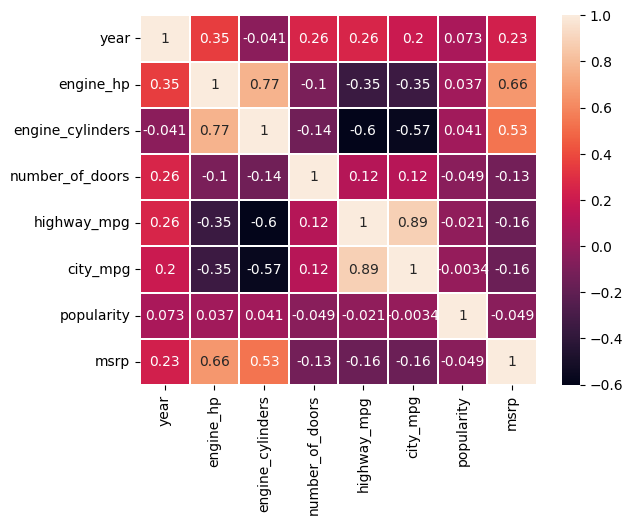

In [60]:
sns.heatmap(data.corr(),annot = True, lw = 0.1);

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


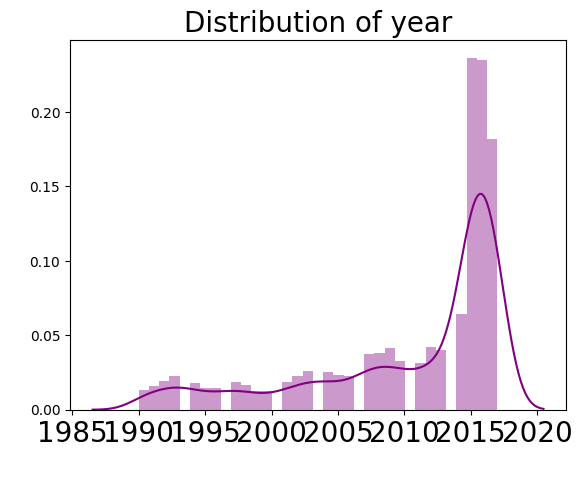

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


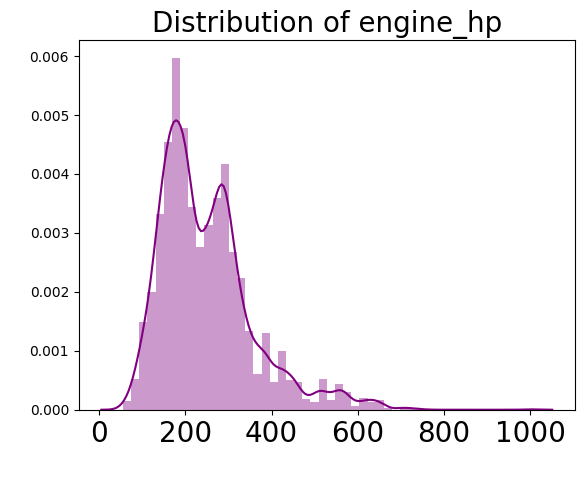

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


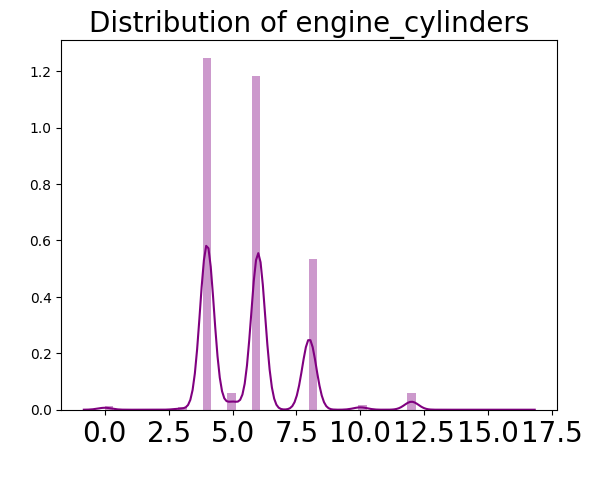

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


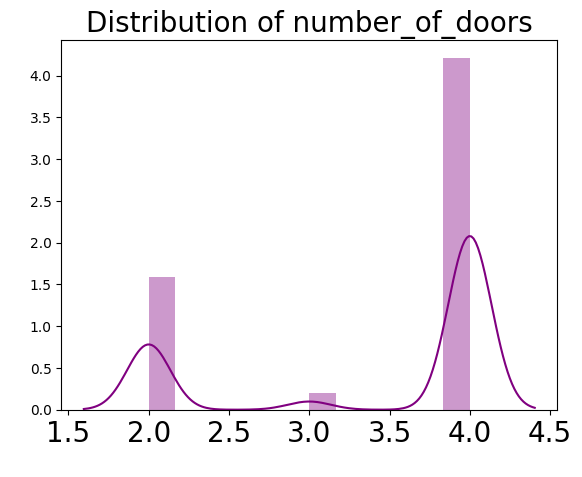

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


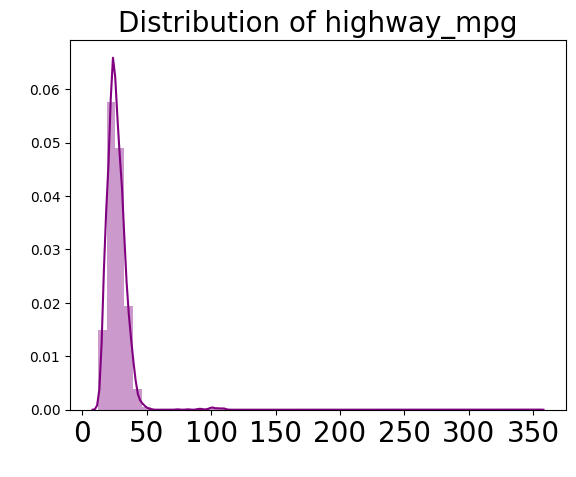

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


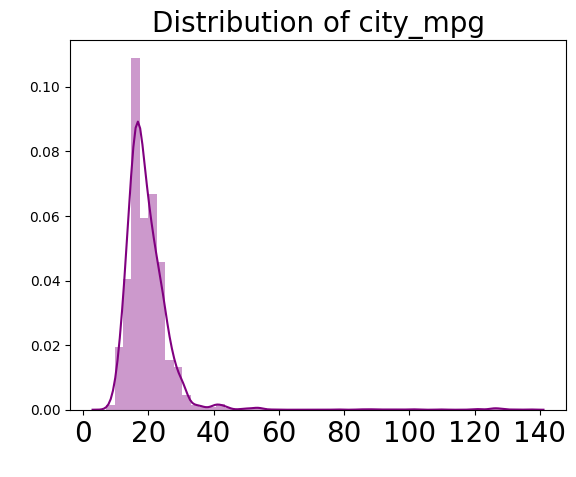

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


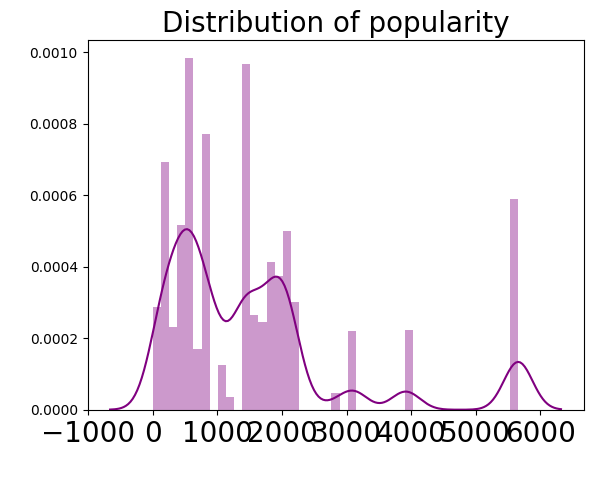

<ipython-input-62-a026906c7da0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i], color = 'purple')


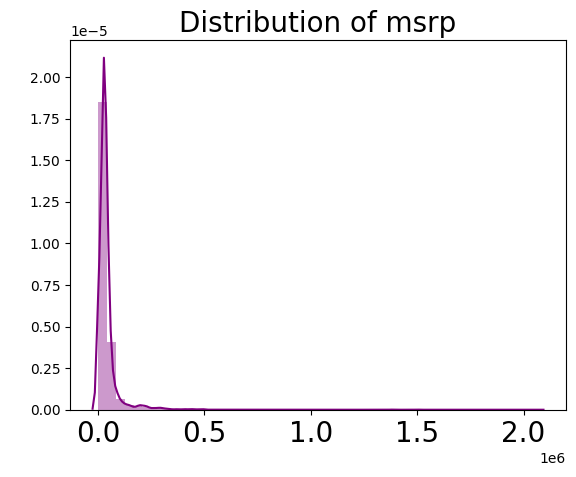

In [62]:
numerical = [col for col in data.columns if col not in categorical]
for i in numerical:
   
    ax = sns.distplot(data[i], color = 'purple')
    plt.title("Distribution of %s" %i, fontsize = 20)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.xticks(fontsize = 20)
    plt.show();
    print('\n')

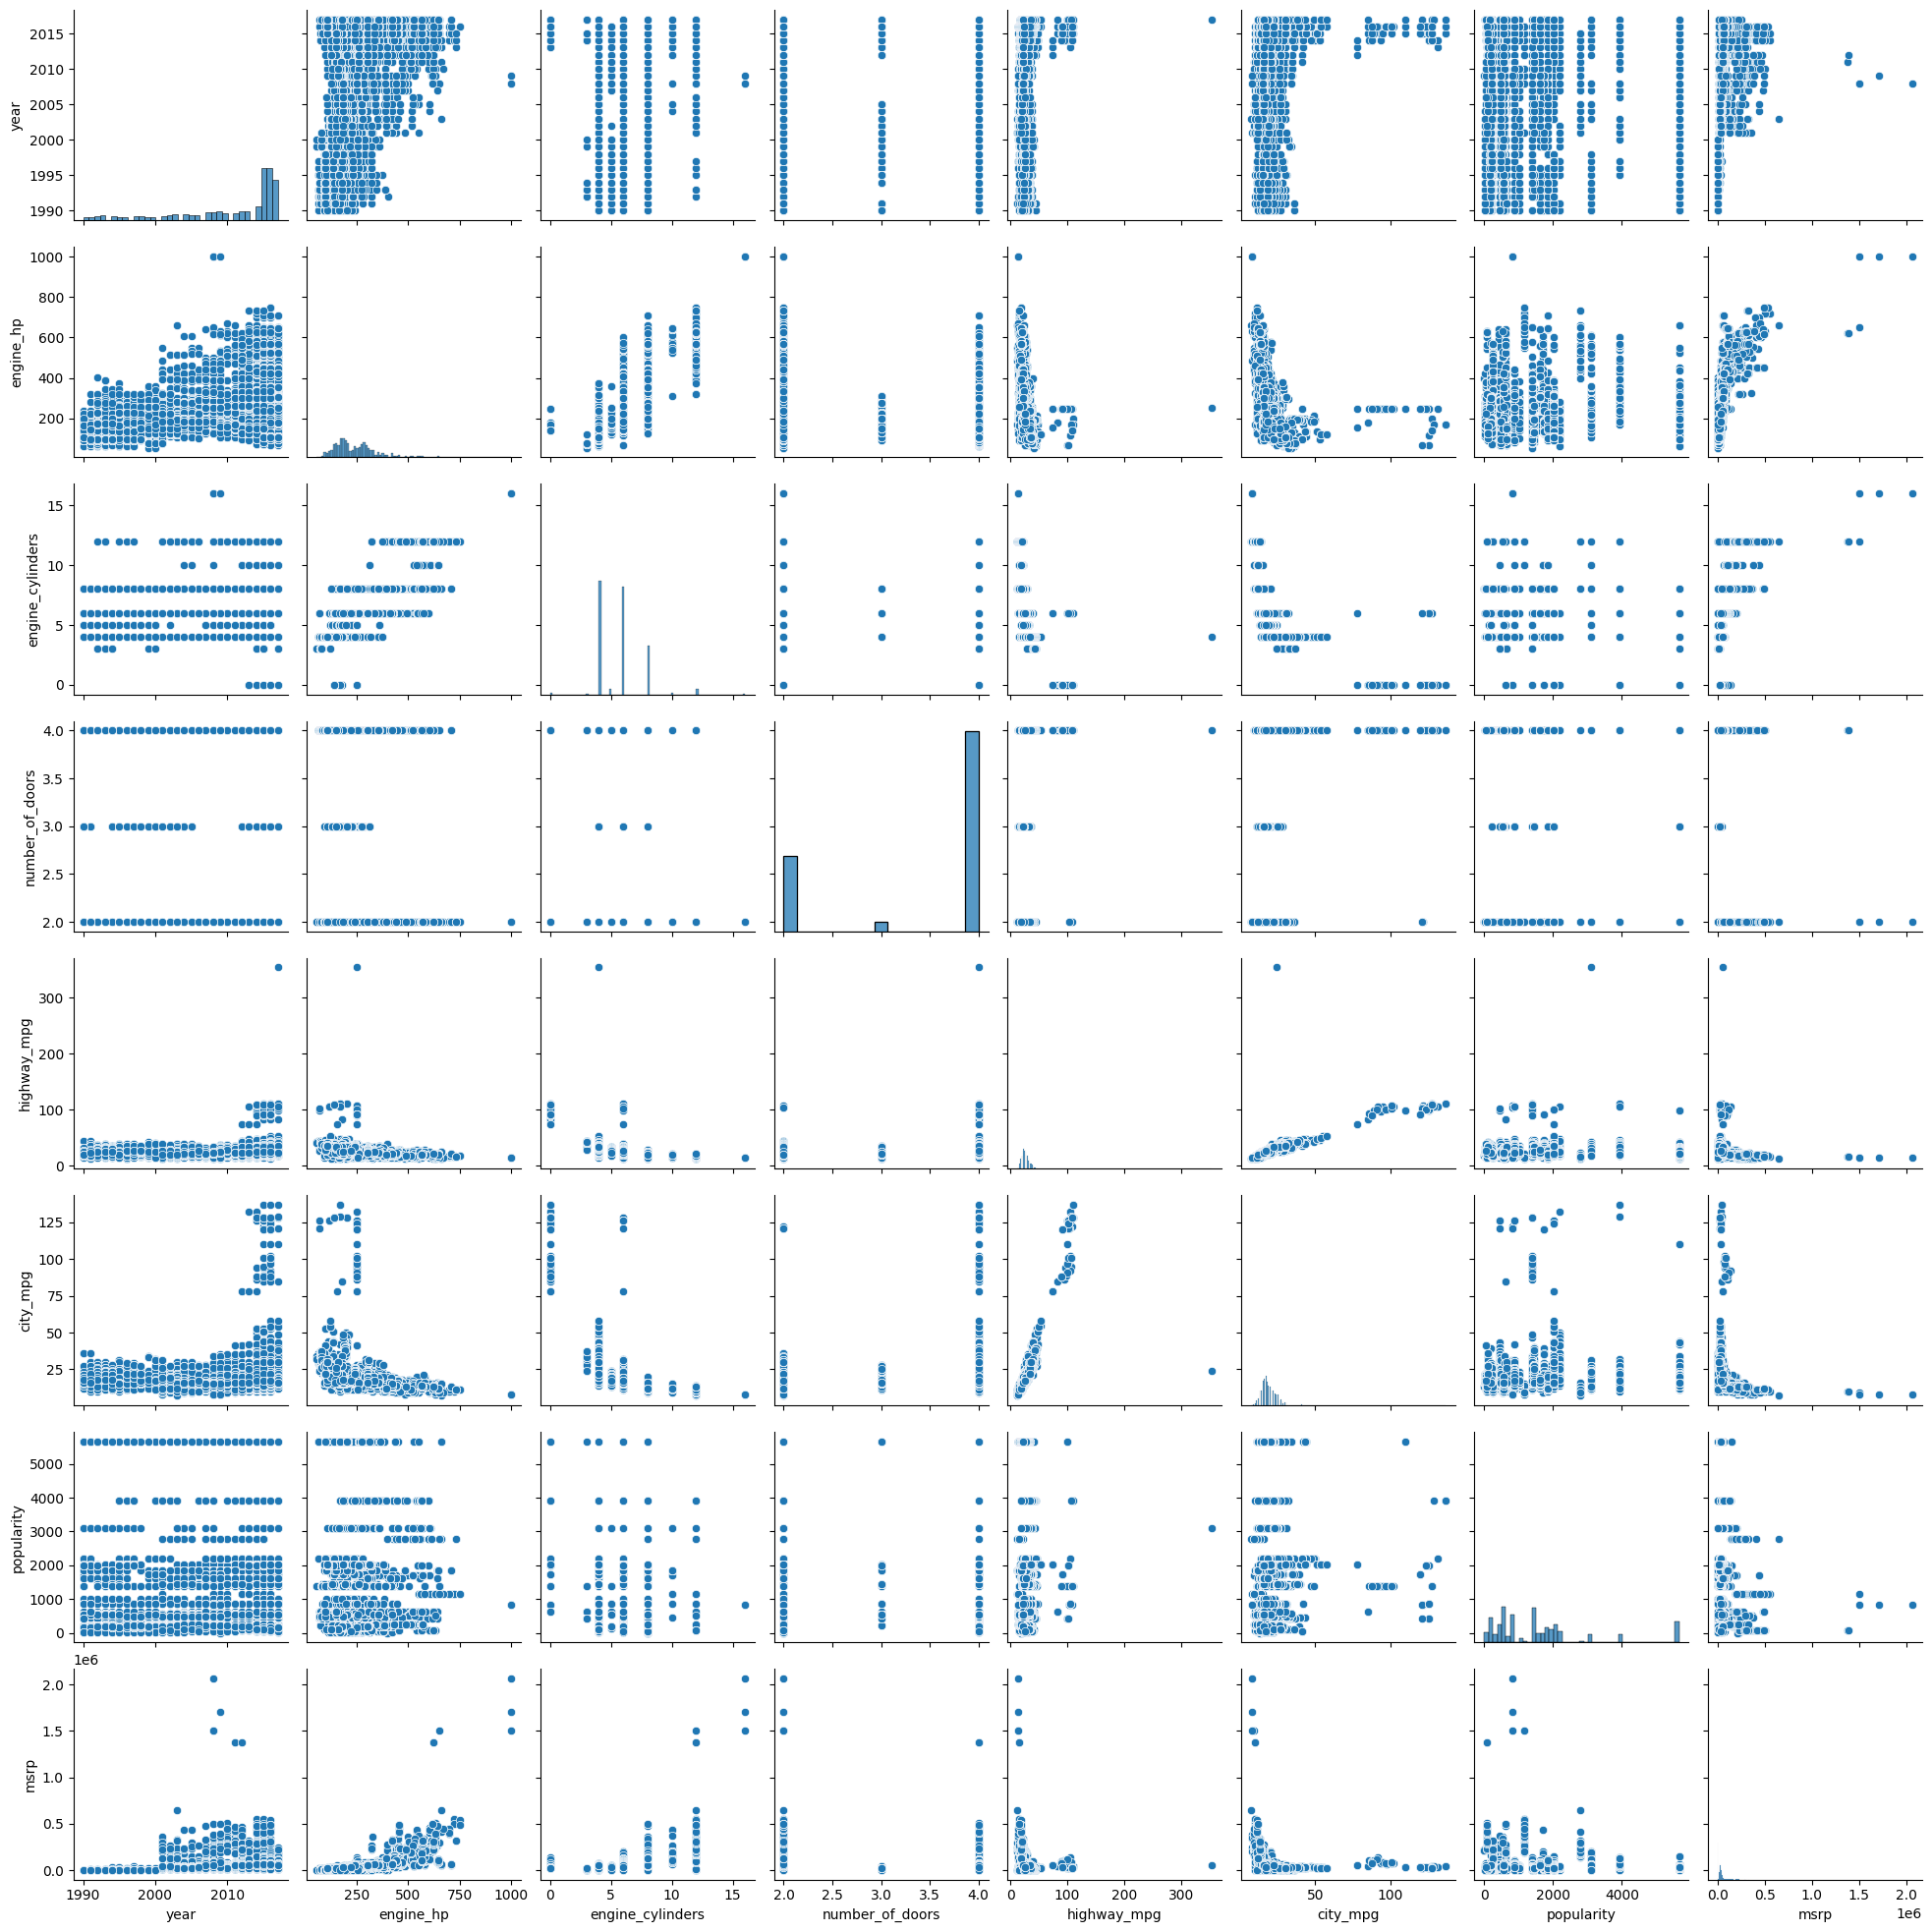

In [63]:
sns.pairplot(data)

<Axes: xlabel='transmission_type', ylabel='msrp'>

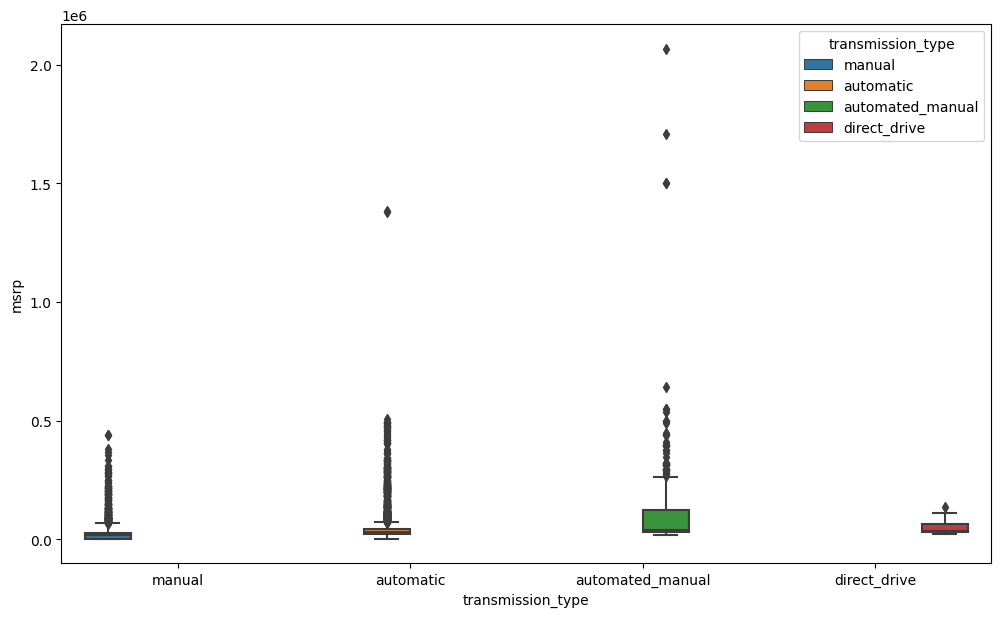

In [64]:
 f,ax=plt.subplots(figsize=(12,7))
 sns.boxplot(x=data['transmission_type'],y=data['msrp'],hue=data['transmission_type'])

Detect outliers

In [85]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<Axes: >

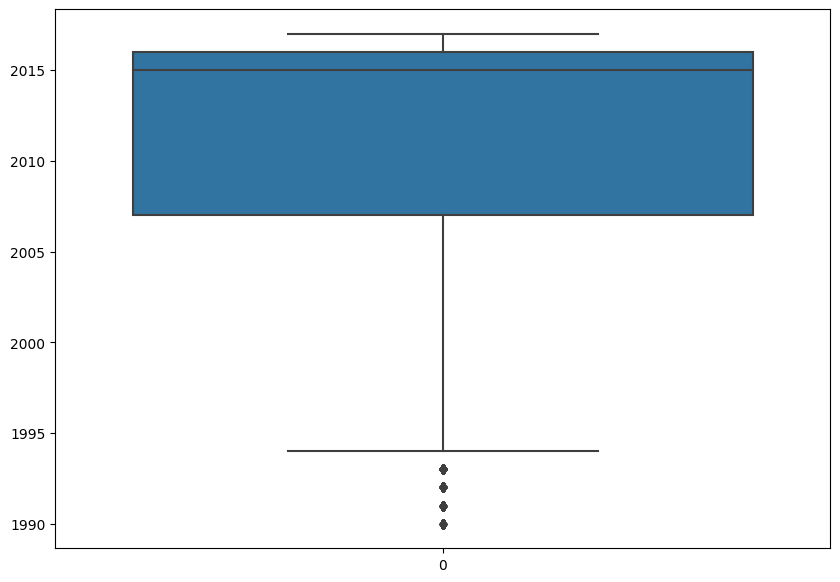

In [72]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['year'])  

In [73]:
#removing outlier in year column
def outlierDetection(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [74]:
lr,ur = outlierDetection(data.year)
lr,ur

(1993.5, 2029.5)

In [75]:
lr,ur=outlierDetection(data.year)
data.drop(data.index[(data.year > ur)],inplace=True)
data.drop(data.index[(data.year < lr)],inplace=True)

<Axes: >

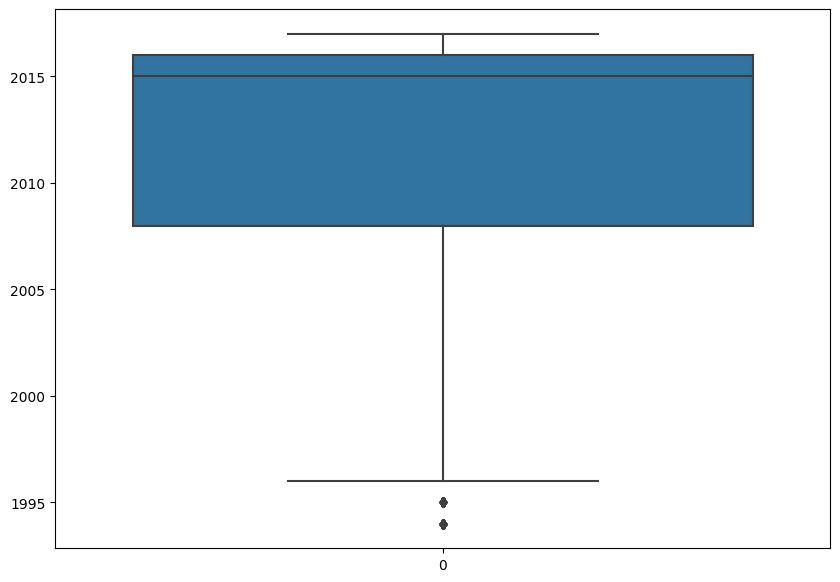

In [78]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['year'])  

In [79]:
lr,ur = outlierDetection(data.year)
lr,ur

(1996.0, 2028.0)

In [80]:
lr,ur=outlierDetection(data.year)
data.drop(data.index[(data.year > ur)],inplace=True)
data.drop(data.index[(data.year < lr)],inplace=True)

<Axes: >

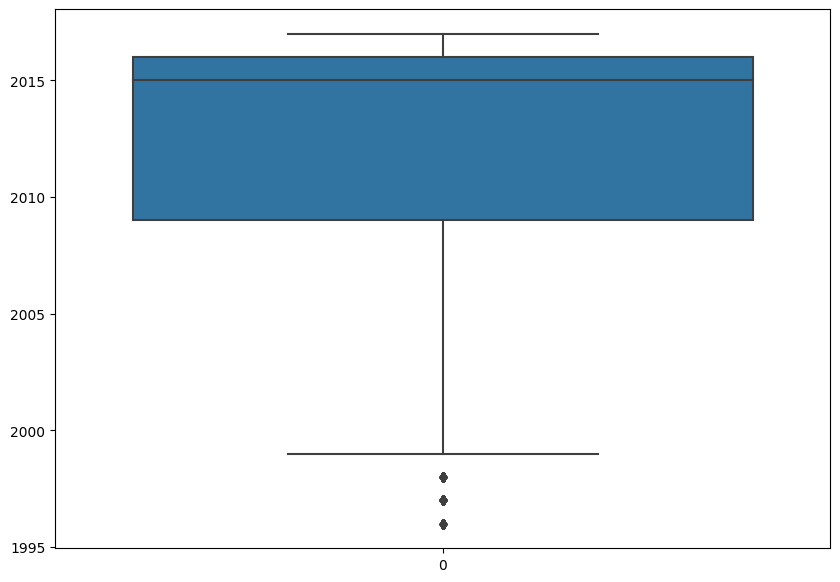

In [81]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['year']) 

In [82]:
lr,ur = outlierDetection(data.year)
lr,ur

(1998.5, 2026.5)

In [83]:
lr,ur=outlierDetection(data.year)
data.drop(data.index[(data.year > ur)],inplace=True)
data.drop(data.index[(data.year < lr)],inplace=True)

<Axes: >

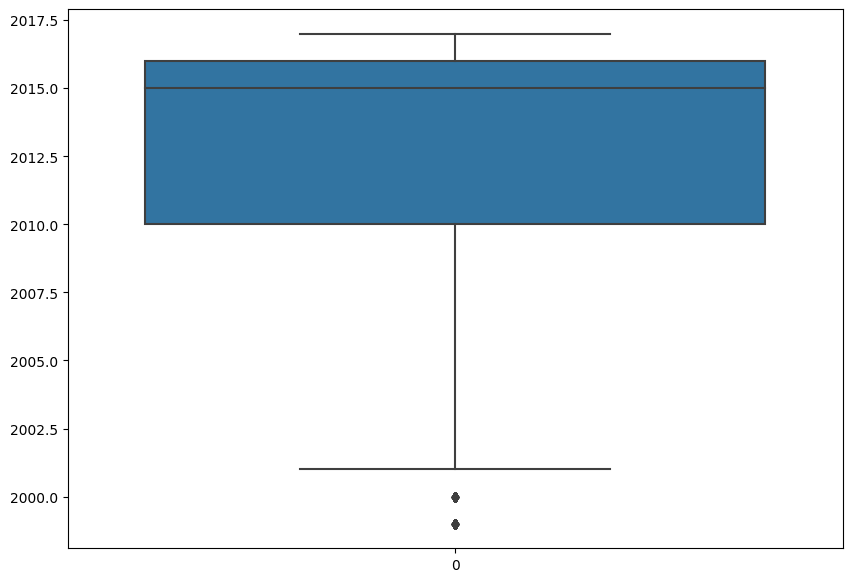

In [84]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['year']) 

In [86]:
lr,ur = outlierDetection(data.year)
lr,ur

(2001.0, 2025.0)

In [87]:
lr,ur=outlierDetection(data.year)
data.drop(data.index[(data.year > ur)],inplace=True)
data.drop(data.index[(data.year < lr)],inplace=True)

<Axes: >

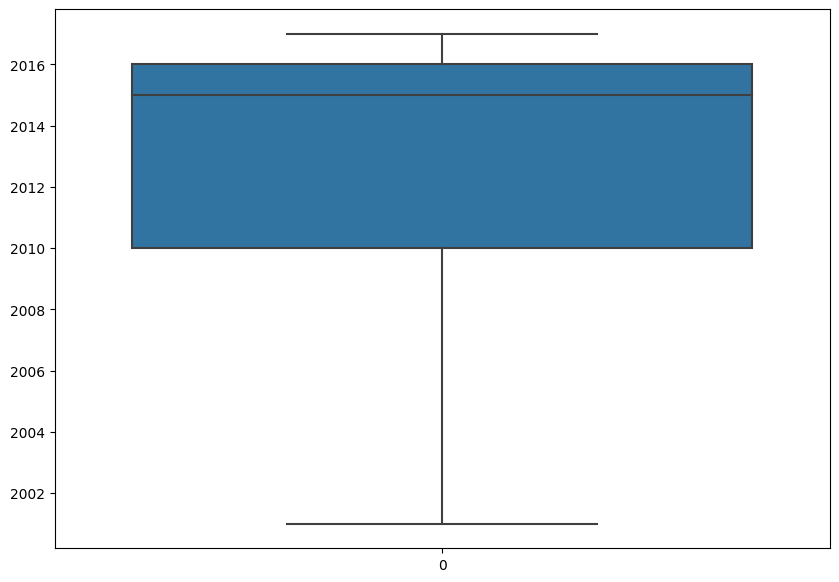

In [88]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['year']) 

<Axes: >

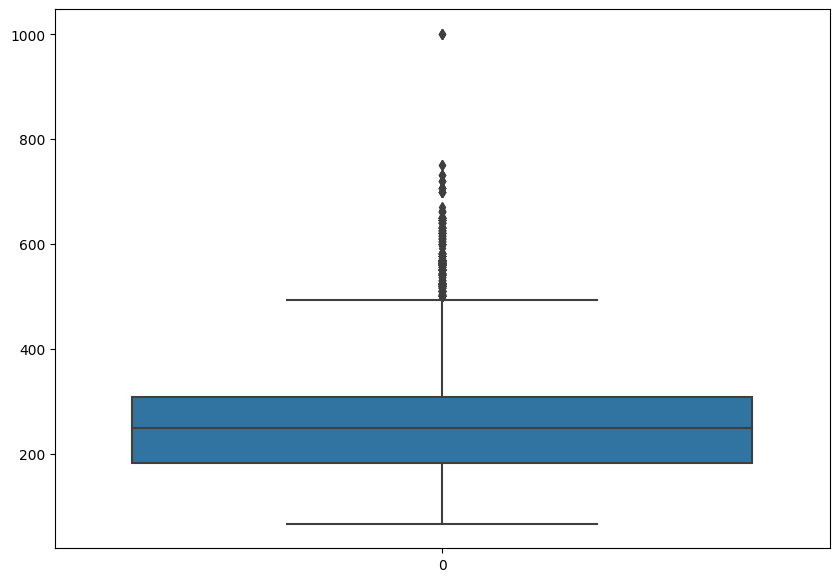

In [89]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['engine_hp']) 


In [90]:
lr,ur = outlierDetection(data.engine_hp)
lr,ur

(-7.0, 497.0)

In [91]:
lr,ur=outlierDetection(data.engine_hp)
data.drop(data.index[(data.engine_hp > ur)],inplace=True)
data.drop(data.index[(data.engine_hp < lr)],inplace=True)

<Axes: >

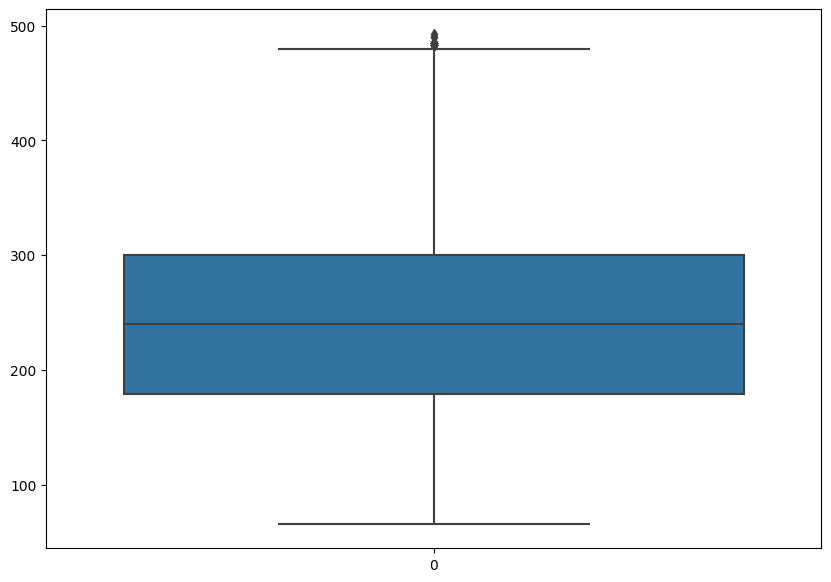

In [92]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['engine_hp']) 

In [93]:
lr,ur = outlierDetection(data.engine_hp)
lr,ur

(-2.5, 481.5)

In [94]:
lr,ur=outlierDetection(data.engine_hp)
data.drop(data.index[(data.engine_hp > ur)],inplace=True)
data.drop(data.index[(data.engine_hp < lr)],inplace=True)

<Axes: >

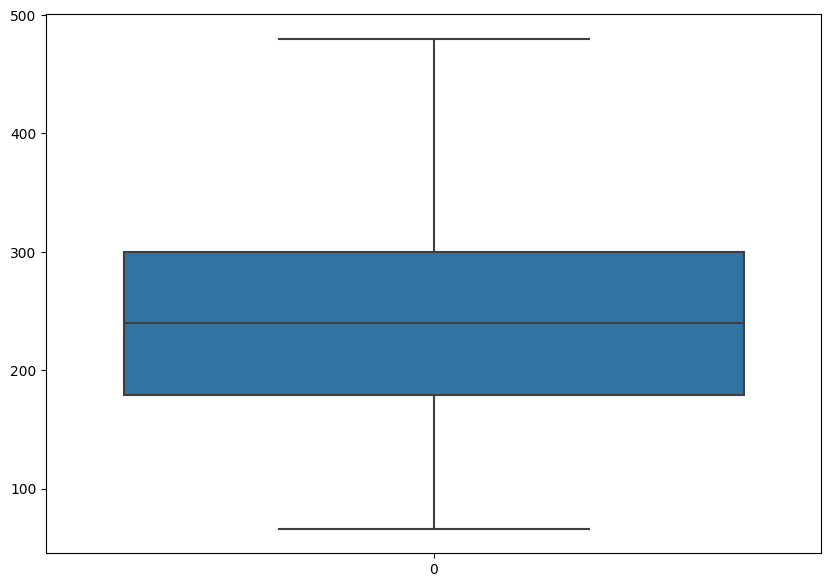

In [95]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['engine_hp']) 

<Axes: >

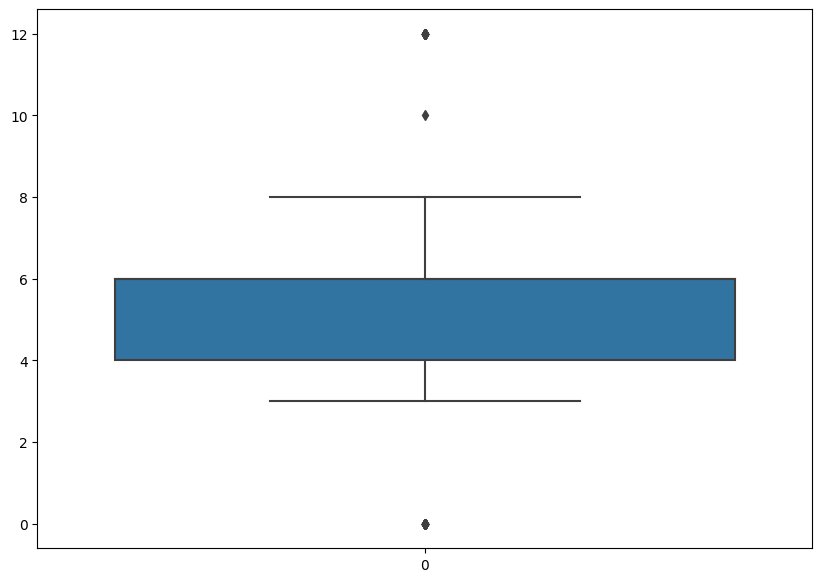

In [96]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['engine_cylinders']) 

In [97]:
lr,ur = outlierDetection(data.engine_cylinders)
lr,ur

(1.0, 9.0)

In [98]:
lr,ur=outlierDetection(data.engine_cylinders)
data.drop(data.index[(data.engine_cylinders > ur)],inplace=True)
data.drop(data.index[(data.engine_cylinders < lr)],inplace=True)

<Axes: >

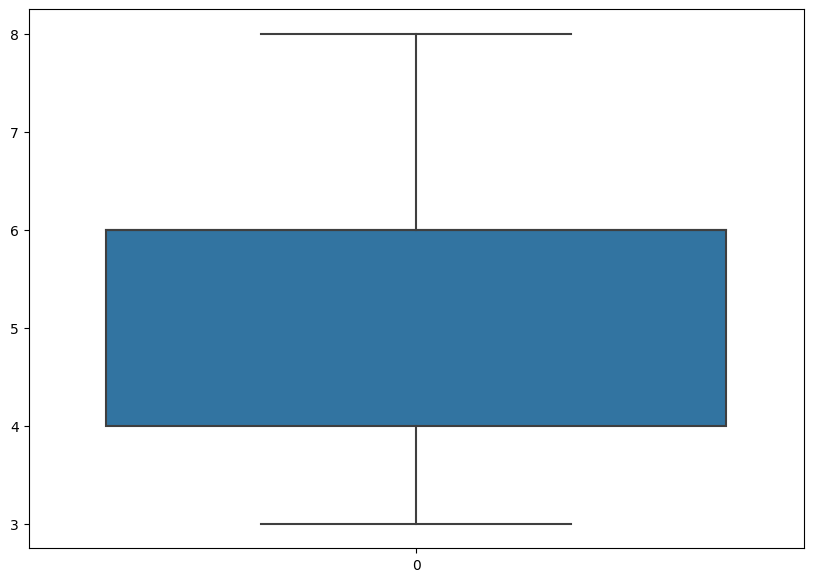

In [99]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['engine_cylinders']) 

<Axes: >

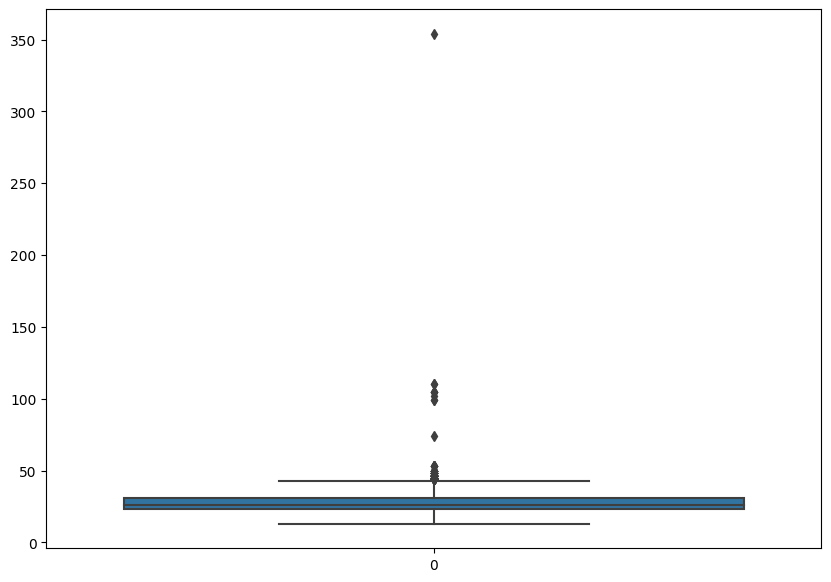

In [100]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['highway_mpg']) 

In [101]:
lr,ur = outlierDetection(data.highway_mpg)
lr,ur

(11.0, 43.0)

In [102]:
lr,ur=outlierDetection(data.highway_mpg)
data.drop(data.index[(data.highway_mpg > ur)],inplace=True)
data.drop(data.index[(data.highway_mpg < lr)],inplace=True)

<Axes: >

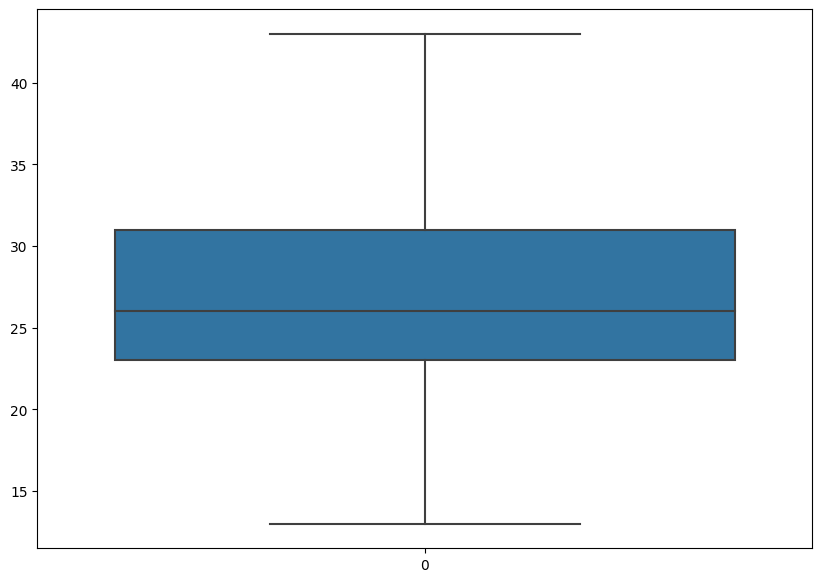

In [103]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['highway_mpg']) 

<Axes: >

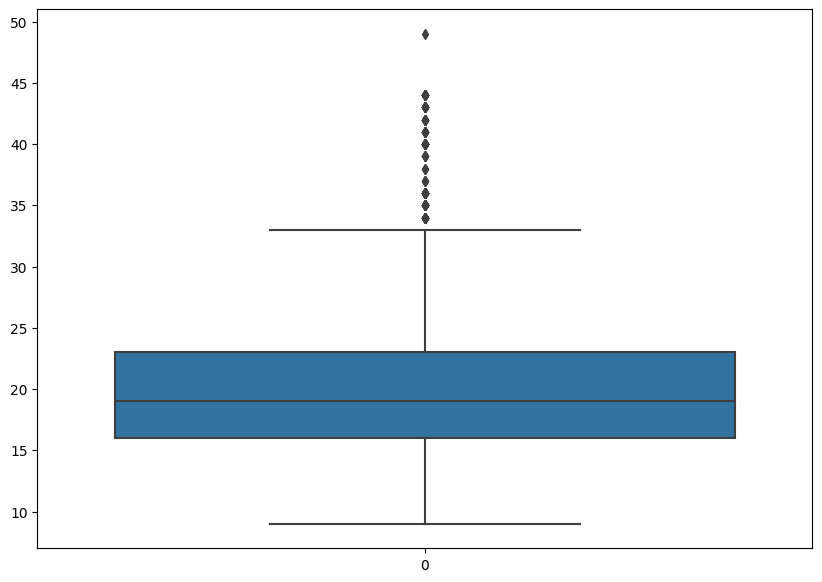

In [104]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['city_mpg']) 

In [105]:
lr,ur = outlierDetection(data.city_mpg)
lr,ur

(5.5, 33.5)

In [107]:
lr,ur=outlierDetection(data.city_mpg)
data.drop(data.index[(data.city_mpg > ur)],inplace=True)
data.drop(data.index[(data.city_mpg < lr)],inplace=True)

<Axes: >

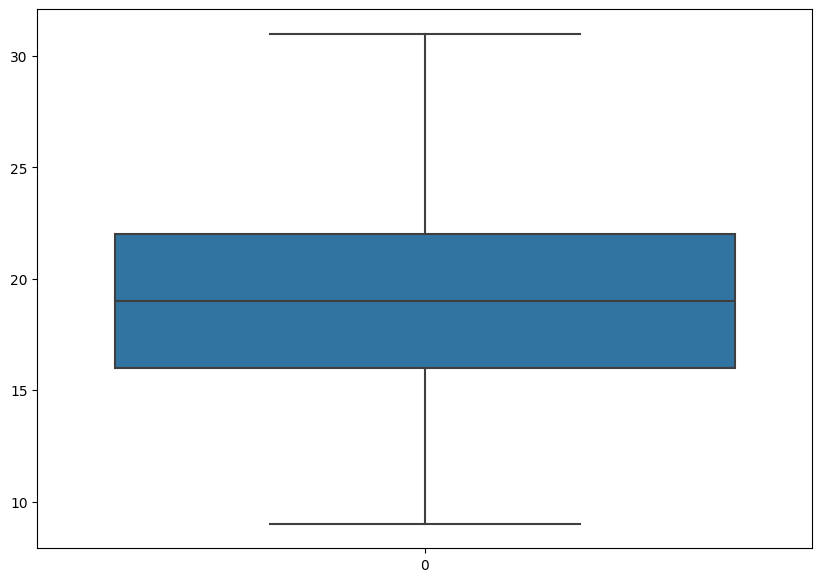

In [108]:
f,ax=plt.subplots(figsize=(10,7))
sns.boxplot(data['city_mpg']) 

ONE HOT ENCODING

In [110]:
final=pd.get_dummies(data, columns=['transmission_type','driven_wheels','vehicle_size'])
final

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,number_of_doors,market_category,vehicle_style,highway_mpg,...,transmission_type_automated_manual,transmission_type_automatic,transmission_type_manual,driven_wheels_all_wheel_drive,driven_wheels_four_wheel_drive,driven_wheels_front_wheel_drive,driven_wheels_rear_wheel_drive,vehicle_size_compact,vehicle_size_large,vehicle_size_midsize
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,2.0,"factory_tuner,luxury,high-performance",coupe,26,...,0,0,1,0,0,0,1,1,0,0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,2.0,"luxury,performance",convertible,28,...,0,0,1,0,0,0,1,1,0,0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,2.0,"luxury,high-performance",coupe,28,...,0,0,1,0,0,0,1,1,0,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,2.0,"luxury,performance",coupe,28,...,0,0,1,0,0,0,1,1,0,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,2.0,luxury,convertible,28,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,4.0,"crossover,hatchback,luxury",4dr_hatchback,23,...,0,1,0,1,0,0,0,0,0,1


CAR PRIZE PREDICTION

In [111]:
# performing label encoding to the categorical columns
columns_to_convert=['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style','market_category']
data[columns_to_convert] = data[columns_to_convert].astype('category')

In [114]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in ['make','model','engine_fuel_type','transmission_type','driven_wheels','vehicle_size','vehicle_style','market_category']: data[col] = label_encoder.fit_transform(data[col])

In [115]:
# splitting the dependent and independent variables

x = data[['popularity','year','engine_hp','engine_cylinders','highway_mpg']].values
y = data['msrp'].values

print(x.shape)
print(y.shape)

(9351, 5)
(9351,)


In [116]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

MODELLING

In [117]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7480, 5)
(7480, 1)
(1871, 5)
(1871, 1)


In [118]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.5228962595343366
Testing Accuracy : 0.46565545698426514


In [119]:
y_pred = lr_model.predict(x_test)
y_pred[0:5]

array([[-0.61781835],
       [ 0.91132864],
       [ 0.62507271],
       [ 0.17010106],
       [-0.19261342]])

Text(0, 0.5, 'Predicted Values')

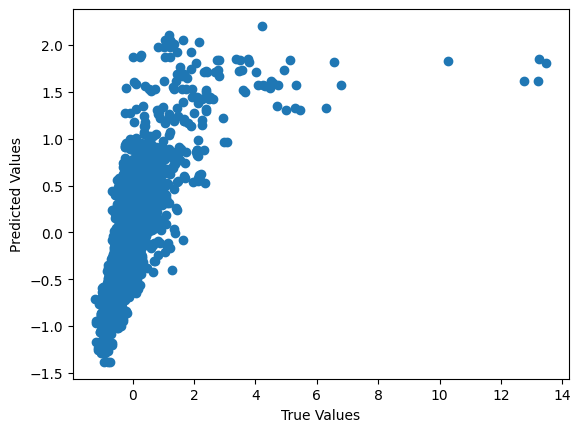

In [120]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [121]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math


print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.6517416919927694
MAE :  0.39108735641916814
RSME :  0.807305203744389


In [122]:
from sklearn.svm import SVR
svr_model=SVR(kernel = 'rbf')
svr_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",svr_model.score(x_train,y_train))
print("Testing Accuracy :",svr_model.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy : 0.7062539429759731
Testing Accuracy : 0.6654834472829481


In [123]:
y_pred = svr_model.predict(x_test)
y_pred[0:5]

array([-0.57507105,  0.35810001,  0.27627262, -0.02463471, -0.23877674])

In [124]:
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.4080108741018431
MAE :  0.2778032536779462
RSME :  0.6387572888835344


In [125]:
from sklearn.ensemble import RandomForestRegressor

rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(x_train,y_train)

# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))

<ipython-input-125-e8077c22148c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(x_train,y_train)


Training Accuracy : 0.9632443448830175
Testing Accuracy : 0.9459862305800438


In [126]:
y_pred = rfc_model.predict(x_test)
y_pred[0:5]

array([-0.50707313,  0.11940999,  1.48661703, -0.01057947,  0.05829018])

In [127]:
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  0.06588076164115128
MAE :  0.15579026170785126
RSME :  0.2566724793217054


Random Forest gives highest accuracy hence it is the best algorithm to predict Car Prices